In [1]:
# use random forest for breast cancer data 
# number of trees
# cross-validation, and oob
# feature importance

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
X = data.data
Y = data.target
print(X.shape)
# to demonstrate the case, when there are a lot of noisy features
noise = np.random.randn(X.shape[0], X.shape[0]) # noise from normal distribution
X = np.hstack([X,noise])
print X.shape
print Y[:2]

(569, 30)
(569, 599)
[0 0]


In [21]:
# demo resample data
Xdemo = X[:10]
Xdemo_resample_index = np.random.choice([i for i in range(10)], 10)
Xdemo_resample = X[Xdemo_resample_index]
print "indices after resample: ", Xdemo_resample_index
print "resampled training data: ", Xdemo_resample

indices after resample:  [9 5 0 5 5 3 5 7 0 6]
resampled training data:  [[  1.24600000e+01   2.40400000e+01   8.39700000e+01 ...,  -7.61005972e-01
   -1.33461520e-01   2.95899620e-01]
 [  1.24500000e+01   1.57000000e+01   8.25700000e+01 ...,  -1.86721418e+00
    1.30738319e+00  -8.10507820e-01]
 [  1.79900000e+01   1.03800000e+01   1.22800000e+02 ...,   2.12423864e+00
    6.34019481e-01   3.90104235e-01]
 ..., 
 [  1.37100000e+01   2.08300000e+01   9.02000000e+01 ...,  -3.64481438e-02
   -8.77916158e-01   8.94025511e-01]
 [  1.79900000e+01   1.03800000e+01   1.22800000e+02 ...,   2.12423864e+00
    6.34019481e-01   3.90104235e-01]
 [  1.82500000e+01   1.99800000e+01   1.19600000e+02 ...,  -1.00604175e+00
    2.80295376e-01  -5.84582397e-02]]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [7]:
# experiment 1, prediction power and number of trees
from sklearn.ensemble import RandomForestClassifier as RFC
scores = []
n_trees_list = [1,2,5,10,20,50,80]
for n_trees in n_trees_list:
    # build a model using different number of trees
    model = RFC(n_estimators = n_trees) 
    # now train the model
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))

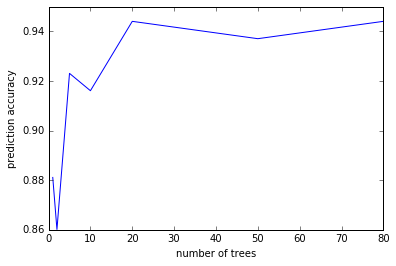

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(n_trees_list, scores)
plt.xlabel("number of trees")
plt.ylabel("prediction accuracy")
plt.show()

# in principle, the more trees, the better

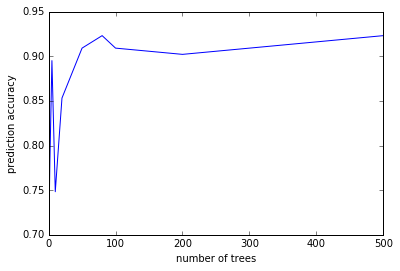

In [9]:
# experiment 1, prediction power and number of trees
from sklearn.ensemble import RandomForestClassifier as RFC
scores = []
n_trees_list = [1,2,5,10,20,50,80, 100, 200 ,500]
for n_trees in n_trees_list:
    model = RFC(n_estimators = n_trees, max_features=3)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
    
plt.plot(n_trees_list, scores)
plt.xlabel("number of trees")
plt.ylabel("prediction accuracy")
plt.show()

In [10]:
# feature importance
model = RFC(50)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [11]:
model.feature_importances_

array([  3.17159398e-02,   6.65315462e-03,   9.37000857e-02,
         2.28687527e-02,   8.96816215e-04,   1.05774982e-02,
         2.17666901e-02,   9.30483077e-02,   5.12950711e-03,
         6.00479085e-04,   1.32910558e-02,   7.43001082e-04,
         1.74591657e-02,   6.27277724e-02,   1.16559950e-03,
         2.77238661e-03,   2.26115257e-02,   4.15356247e-03,
         1.94506757e-04,   3.10500205e-03,   7.53234454e-02,
         8.86863872e-03,   7.99488133e-02,   3.11087415e-02,
         1.38527955e-02,   3.05032541e-02,   4.21362883e-02,
         3.72919842e-02,   8.60252722e-03,   4.62060066e-03,
         5.02955919e-04,   2.94246310e-04,   8.94337703e-04,
         1.19413704e-03,   3.77601575e-04,   1.68480534e-03,
         7.27927909e-04,   5.62421220e-04,   0.00000000e+00,
         0.00000000e+00,   5.78226257e-04,   0.00000000e+00,
         4.68746212e-04,   0.00000000e+00,   0.00000000e+00,
         3.39920738e-04,   1.58629678e-04,   6.33765886e-05,
         1.30776138e-04,

In [12]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='|S23')

In [13]:
zippped_featureImg = zip(data.feature_names, model.feature_importances_)
zippped_featureImg

[('mean radius', 0.031715939795429984),
 ('mean texture', 0.0066531546202709714),
 ('mean perimeter', 0.093700085712286912),
 ('mean area', 0.02286875271428309),
 ('mean smoothness', 0.00089681621520113278),
 ('mean compactness', 0.010577498227633167),
 ('mean concavity', 0.021766690076346594),
 ('mean concave points', 0.093048307664233651),
 ('mean symmetry', 0.005129507107150981),
 ('mean fractal dimension', 0.00060047908496632869),
 ('radius error', 0.013291055805479764),
 ('texture error', 0.00074300108183832786),
 ('perimeter error', 0.017459165735731096),
 ('area error', 0.062727772376349925),
 ('smoothness error', 0.0011655994974119907),
 ('compactness error', 0.0027723866060717834),
 ('concavity error', 0.022611525663761636),
 ('concave points error', 0.0041535624664707704),
 ('symmetry error', 0.00019450675671502159),
 ('fractal dimension error', 0.0031050020533412996),
 ('worst radius', 0.075323445396155889),
 ('worst texture', 0.0088686387219507751),
 ('worst perimeter', 0.0

In [14]:
print sorted(zippped_featureImg, key=lambda x: x[1], reverse=True)

[('mean perimeter', 0.093700085712286912), ('mean concave points', 0.093048307664233651), ('worst perimeter', 0.079948813251494236), ('worst radius', 0.075323445396155889), ('area error', 0.062727772376349925), ('worst concavity', 0.042136288334325499), ('worst concave points', 0.037291984216497022), ('mean radius', 0.031715939795429984), ('worst area', 0.031108741545071296), ('worst compactness', 0.030503254069794941), ('mean area', 0.02286875271428309), ('concavity error', 0.022611525663761636), ('mean concavity', 0.021766690076346594), ('perimeter error', 0.017459165735731096), ('worst smoothness', 0.013852795539472084), ('radius error', 0.013291055805479764), ('mean compactness', 0.010577498227633167), ('worst texture', 0.0088686387219507751), ('worst symmetry', 0.0086025272201238207), ('mean texture', 0.0066531546202709714), ('mean symmetry', 0.005129507107150981), ('worst fractal dimension', 0.0046206006632908249), ('concave points error', 0.0041535624664707704), ('fractal dimens

In [15]:
index_most_important = list(data.feature_names).index("worst radius")

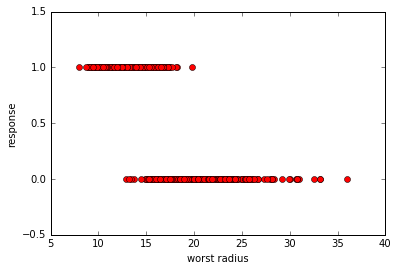

In [16]:
plt.plot(X[:, index_most_important], Y, 'ro')
plt.xlabel('worst radius')
plt.ylabel('response')
plt.ylim(-0.5,1.5)
plt.show()

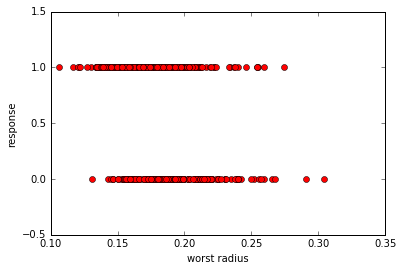

In [17]:
index_least_important = list(data.feature_names).index('mean symmetry')
plt.plot(X[:, index_least_important], Y, 'ro')
plt.xlabel('worst radius')
plt.ylabel('response')
plt.ylim(-0.5,1.5)
plt.show()

In [18]:
# out of bag score, replace cross validation
import time
model = RFC(50, oob_score=True)

start = time.clock()
model.fit(X,Y)
print(model.oob_score_) # also to estimate the test score
print "Running time (sec): ", (time.clock() - start)

from sklearn.model_selection import cross_val_score
start = time.clock()
print cross_val_score(RFC(50), X, Y, cv=5).mean()
print "Running time (sec): ", (time.clock() - start)



0.947275922671
Running time (sec):  0.697596
0.947395151982
Running time (sec):  2.425713
